In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings
from scipy import stats
from scipy.special import gamma
from scipy.special import beta
from collections import Counter
import random


1. Uppvärmning. Följande uppgifter bör göra dig bekant med datamängden och förbereda data för användning när du bygger dina prediktiva modeller

(a) Alla betyg i dataramen är för närvarande tal mellan 0 och 10. Normalisera
dessa värden i dataramen så att de är mellan 0 och 1.

In [2]:
df = pd.read_csv("SLS22.csv")

# a. Normalize data
# run 1,2
for r in range(1, 2+1):
    run = "run " + str(r)
    df[run] = df[run]/np.max(df[run])
# trick 1-6
for t in range(1, 6+1):
    trick = "trick " + str(t)
    df[trick] = df[trick]/np.max(df[trick])

(b) Gör ett histogram för alla trickbetyg för trick 1−4. Vad observerar du? Finns
det ett visst värde som dyker upp oftare än de andra? Om så är fallet, hur
står detta värde i jämförelse med de andra?

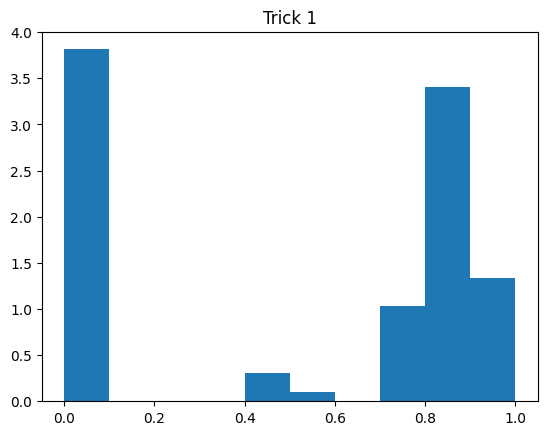

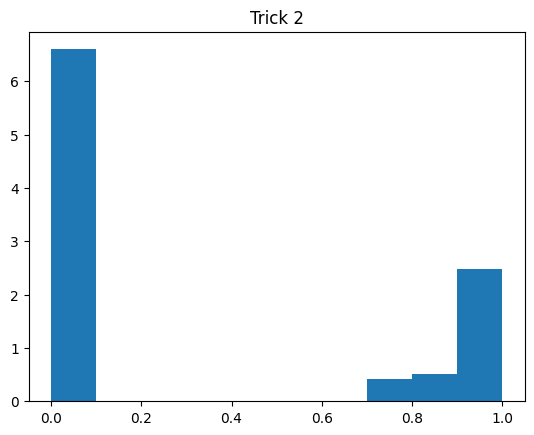

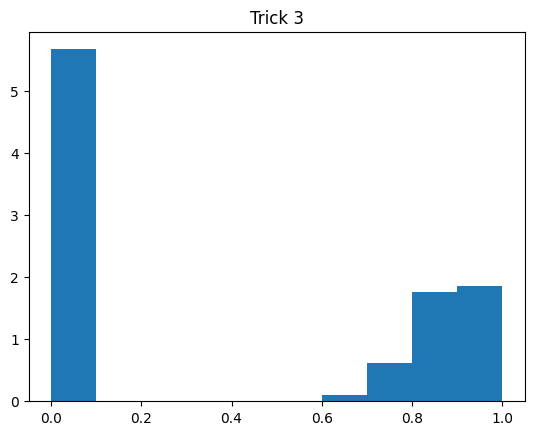

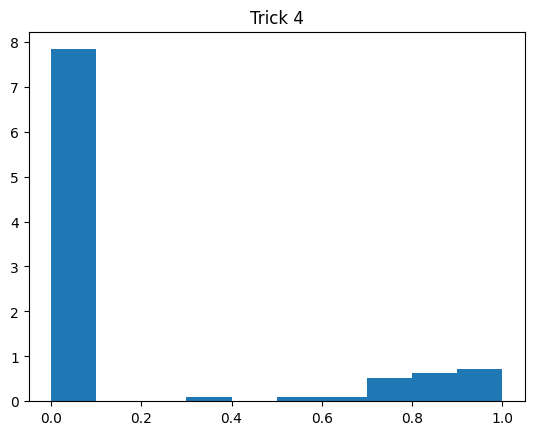

In [3]:
# b. Histograms for tricks 1-4
for t in range(1, 4+1):
    plt.title("Trick " + str(t))
    plt.hist(df["trick " + str(t)], density=True)
    plt.show()

(c) For varje trick 1−4 skapa en ny kolumn med namnet ’make i’ för $i = 1, 2, 3, 4$
så att värdet av ’make i’ i en given rad är 1 om skateboardåkaren landade
trick i och 0 annars.

In [4]:
# c. make i
def f(x):
    if x == 0:
        return 0
    else:
        return 1


for k in range(1, 4+1):
    make = df["trick " + str(k)].apply(f)
    make.name = "make " + str(k)  # Assign the name directly here
    df = pd.concat([df, make], axis=1)  # Use df[cols] to include all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

d) För varje skateboardåkare skatta sannolikheten att ett trick får ett betyg
som är större än 0.6 givet att skateboardåkaren landar tricket. Vad är sanno-
likheten att skateboardåkaren inte lyckas landa ett visst trick? Vad observerar
du? Relatera dina observationer till era observationer i del (b).

In [5]:
# d.

all_skaters = []
for row in range(len(df)):
    if df["id"][row] not in all_skaters:
        all_skaters.append(df["id"][row])

prob_list = []
miss_list = []
for skater in all_skaters:
    score = 0
    make_counter = 0
    miss_counter = 0
    total_counter = 0
    for row in range(len(df)):
        if df["id"][row] == skater:
            for trick_no in range(1, 6+1):
                if pd.notna(df["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    total_counter += 1
                    if df["trick " + str(trick_no)][row] == 0:
                        miss_counter += 1
                    elif df["trick " + str(trick_no)][row] > 0:
                        make_counter += 1
                        if df["trick " + str(trick_no)][row] > .6:
                            score += 1
    try:
        prob_list.append(score/make_counter)
    except ZeroDivisionError:
        prob_list.append(0)
    try:
        miss_list.append(miss_counter/total_counter)
    except ZeroDivisionError:
        miss_list.append(0)

# Create a PrettyTable object
table = PrettyTable()

# Define the column names
table.field_names = ["Skater ID", "Average Score of landed trick", "Miss probability"]

# Add data to the table
for skater, avg_score, prob_miss in zip(all_skaters, prob_list, miss_list):
    table.add_row([skater, round(avg_score,3), round(prob_miss,3)])

# Print the table
print(table)

+-----------+-------------------------------+------------------+
| Skater ID | Average Score of landed trick | Miss probability |
+-----------+-------------------------------+------------------+
|   Berger  |              1.0              |      0.833       |
|    Papa   |              1.0              |      0.562       |
|  Pudwill  |             0.333             |       0.75       |
|   Shirai  |              1.0              |      0.636       |
|    Mota   |              1.0              |       0.75       |
| Ribeiro G |             0.929             |       0.5        |
|  Decenzo  |              1.0              |      0.611       |
|  Hoefler  |              1.0              |      0.611       |
|    Foy    |              1.0              |       0.5        |
|   Hoban   |              1.0              |      0.636       |
|   Midler  |              1.0              |      0.667       |
|   Milou   |              1.0              |      0.542       |
| Rodriguez |            

e) Gör ett spridningsdiagram för runbetyg 1 mot runbetyg 2. Ser du någon
tydligt korrelation från diagrammet?

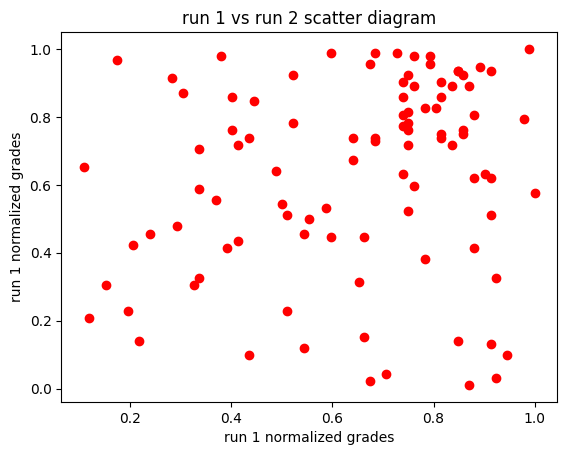

In [6]:
# e. run 1 & run 2 scatter diagram
plt.plot(df["run 1"], df["run 2"], 'ro')
plt.title('run 1 vs run 2 scatter diagram')
plt.xlabel('run 1 normalized grades')
plt.ylabel('run 1 normalized grades')
plt.show()

In [7]:
# (a) point estimates for V
# warnings.filterwarnings("ignore", category=UserWarning) #remember indexing
# Note: Warnings are ignored because index warnings are harmless and for the
# uninterupted run of the jupyter notebook, but remember that they're ignored!

# Remove unwanted skaters
df_alt = df[df.id != "Horigome"]
df_alt = df_alt[df.id != "Joslin"]
df_alt = df_alt[df.id != "Milou"]
df_alt = df_alt[df.id != "Ribeiro G"]

skaters = ["Majerus", "Oliveira", "Decenzo", "Santiago",
           "Papa", "Eaton", "Mota", "Shirai",
           "Jordan", "Hoefler", "Hoban", "Gustavo",
           "Ribeiro C", "O’neill", "Foy", "Midler"]

C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == "__main__":
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


2. En frekventistisk modell. Vi skulle vilja bygga en modell som kan förutsäga vilka av de 16 skateboardåkarna i LCQ:en vinner en plats i finalen. Ett sätt att göra det är att bygga en modell för varje skateboardåkare, använda modellerna för att simulera runbetyg och trickbetyg för varje skateboardåkare och kombinera simuleringarna för att simulera LCQ:en. Vi kan simulera flera LCQ:ar och extrahera de fyra skateboardåkarna med de högsta totalbetygen från var och en. Vår prediktion blir typvärdet av dessa resultat. Observera att denna modell antar att skateboardåkarnas prestationer är oberoende. För enkelheten antar vi att betyget på en viss run $Y_i$ och betyget på ett visst trick $X_i$ är oberoende för varje skateboardåkare $i$. Vi antar även att alla trickbetyg och runbetyg är oberoende och likafördelade utfall från $X_i$ respektive $Y_i$. Vi kan då börja med att specificera en modell för $X_i$ och $Y_i$.

Baserat på observationerna i Uppgift 1 är en rimlig modell för $X_i$ följande:

$
X_i =
\begin{cases}
    0 & \text{om } V_i = 0, \\
    Z_i & \text{om } V_i = 1,
\end{cases}
$

där $V_i \sim \text{Ber}(\theta_i)$, $Z_i \sim \text{Beta}(\alpha_i, \beta_i)$ och $V_i \perp\!\!\!\perp Z_i$. Det kan visas att

$
f_{X_i}(x_i | \theta_i, \alpha_i, \beta_i) = (1 - \theta_i)1_{x_i=0} + \theta_i f_{Z_i}(x_i)1_{x_i \neq 0}.
$

Valet $V_i \sim \text{Ber}(\theta_i)$ modellerar att en skateboardåkare får betyg 0 om och endast om de inte lyckas landa tricket, medan valet $Z_i \sim \text{Beta}(\alpha_i, \beta_i)$ modellerar att betyget för ett visst trick är delen av tricket som var "perfekt."


(a) Ge en punktskattning för varje $θ_i$, sannolikheten att skateboardåkaren i landar
ett trick.

+-----------+--------------------------+--------------------+
| Skater ID | Point estimate for Theta | Estimated Variance |
+-----------+--------------------------+--------------------+
|  Majerus  |          0.375           |       0.021        |
|  Oliveira |          0.417           |       0.022        |
|  Decenzo  |          0.389           |       0.022        |
|  Santiago |          0.083           |       0.007        |
|    Papa   |          0.438           |       0.022        |
|   Eaton   |          0.625           |       0.021        |
|    Mota   |           0.25           |       0.017        |
|   Shirai  |          0.364           |       0.021        |
|   Jordan  |           0.4            |       0.022        |
|  Hoefler  |          0.389           |       0.022        |
|   Hoban   |          0.364           |       0.021        |
|  Gustavo  |           0.4            |       0.022        |
| Ribeiro C |           0.25           |       0.017        |
|  O’nei

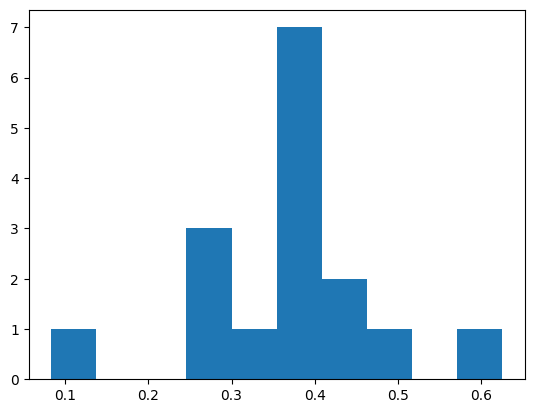

In [8]:
theta_parameters = []
for skater in skaters:
    miss_counter = 0
    total_counter = 0
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for trick_no in range(1, 6+1):
                    if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                        total_counter += 1
                        if df_alt["trick " + str(trick_no)][row] == 0:
                            miss_counter += 1
        except KeyError:
            # print("hi")
            pass
    # print(skater)
    # print(total_counter)
    theta_parameters.append(1 - miss_counter / total_counter)

# Create a PrettyTable object
table = PrettyTable()

# Define the column names
table.field_names = ["Skater ID", "Point estimate for Theta", "Estimated Variance"]

# Add data to the table
for skater, theta_parameter in zip(skaters, theta_parameters):
    estimated_var = (theta_parameter * (1 - theta_parameter)) / (total_counter - 1)
    table.add_row([skater, round(theta_parameter, 3), round(estimated_var, 3)])

# Print the table
print(table)

plt.hist(theta_parameters)
plt.show()

(b) Ge en punktskattning för parametrarna $[α_i, β_i]^T$ för varje skateboardåkare i.
Finns det skateboardåkare för vilka din valda punktskattning inte existera? I
så fall föreslå en alternativ punktskattning för dessa $α_i, β_i$. Motivera dina val punktskattningar.

In [9]:
# (b) point estimates for X
alpha_parameters = []
beta_parameters = []
for skater in skaters:
    Z_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for trick_no in range(1, 6+1):
                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    if df_alt["trick " + str(trick_no)][row] > 0:
                        Z_outcomes.append(df_alt["trick " + str(trick_no)][row])
        except KeyError:
            # print("hi")
            pass
    Z_mean = np.mean(Z_outcomes)
    Z_usv = np.var(Z_outcomes, ddof=True)   # unbiased sample variance
    # https://statproofbook.github.io/P/beta-mome.html
    alpha_parameters.append(Z_mean * (Z_mean * (1 - Z_mean) / Z_usv - 1))
    beta_parameters.append((1 - Z_mean) * (Z_mean * (1 - Z_mean) / Z_usv - 1))

# Convert lists to numpy arrays
alpha_parameters = np.array(alpha_parameters)
beta_parameters = np.array(beta_parameters)

# Replace NaN values with mean
alpha_parameters_X = np.nan_to_num(alpha_parameters, nan=np.nanmean(alpha_parameters))
beta_parameters_X = np.nan_to_num(beta_parameters, nan=np.nanmean(beta_parameters))

# Create a PrettyTable object
table = PrettyTable()

# Define the column names
table.field_names = ["Skater ID", "Alpha Parameter", "Beta Parameter"]

# Add data to the table
for skater, alpha_par, beta_par in zip(skaters, alpha_parameters_X, beta_parameters_X):
    table.add_row([skater, round(alpha_par, 3), round(beta_par, 3)])

# Print the table
print(table)

+-----------+-----------------+----------------+
| Skater ID | Alpha Parameter | Beta Parameter |
+-----------+-----------------+----------------+
|  Majerus  |      1.672      |     1.428      |
|  Oliveira |      68.538     |     12.99      |
|  Decenzo  |      14.273     |     2.115      |
|  Santiago |      54.292     |     8.851      |
|    Papa   |      15.631     |     3.527      |
|   Eaton   |      24.768     |     4.666      |
|    Mota   |      8.317      |     1.756      |
|   Shirai  |      8.463      |     0.458      |
|   Jordan  |      13.394     |     1.376      |
|  Hoefler  |      27.118     |      6.11      |
|   Hoban   |      26.388     |     1.971      |
|  Gustavo  |      56.987     |     10.677     |
| Ribeiro C |     110.672     |     26.124     |
|  O’neill  |     385.243     |     51.749     |
|    Foy    |      19.656     |     2.142      |
|   Midler  |      33.26      |     5.682      |
+-----------+-----------------+----------------+


C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\core\fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(c) Föreslå en modell för $Y_i$ och ge en punktskattning för dina modells parametrar. Motivera dina val för modell och punktskattning.

In [10]:
# (c) Point estimates for Y for which I chose the Beta distribution
alpha_parameters = []
beta_parameters = []
for skater in skaters:
    Z_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for run_no in range(1, 2+1):
                    Z_outcomes.append(df_alt["run " + str(run_no)][row])
        except KeyError:
            pass
    Z_mean = np.mean(Z_outcomes)
    Z_usv = np.var(Z_outcomes, ddof=True)   # unbiased sample variance
    # https://statproofbook.github.io/P/beta-mome.html
    alpha_parameters.append(Z_mean * (Z_mean * (1 - Z_mean) / Z_usv - 1))
    beta_parameters.append((1 - Z_mean) * (Z_mean * (1 - Z_mean) / Z_usv - 1))

# Convert lists to numpy arrays
alpha_parameters_Y = np.array(alpha_parameters)
beta_parameters_Y = np.array(beta_parameters)

# Create a PrettyTable object
table = PrettyTable()

# Define the column names
table.field_names = ["Skater ID", "Alpha Parameter", "Beta Parameter"]

# Add data to the table
for skater, alpha_par, beta_par in zip(skaters, alpha_parameters_X, beta_parameters_X):
    table.add_row([skater, round(alpha_par, 3), round(beta_par, 3)])

# Print the table
print(table)

+-----------+-----------------+----------------+
| Skater ID | Alpha Parameter | Beta Parameter |
+-----------+-----------------+----------------+
|  Majerus  |      1.672      |     1.428      |
|  Oliveira |      68.538     |     12.99      |
|  Decenzo  |      14.273     |     2.115      |
|  Santiago |      54.292     |     8.851      |
|    Papa   |      15.631     |     3.527      |
|   Eaton   |      24.768     |     4.666      |
|    Mota   |      8.317      |     1.756      |
|   Shirai  |      8.463      |     0.458      |
|   Jordan  |      13.394     |     1.376      |
|  Hoefler  |      27.118     |      6.11      |
|   Hoban   |      26.388     |     1.971      |
|  Gustavo  |      56.987     |     10.677     |
| Ribeiro C |     110.672     |     26.124     |
|  O’neill  |     385.243     |     51.749     |
|    Foy    |      19.656     |     2.142      |
|   Midler  |      33.26      |     5.682      |
+-----------+-----------------+----------------+


In [11]:
# (d) lastly: simulate 5000 cups
all_winners = []

for cup in range(5000):
    # 2 runs for each skater
    # 4 tricks for eachs skater
    # calculate scores
    # Set W = [W1, W2, W3, W4], W for Winners
    grades_list = []
    for skater_no in range(len(skaters)):
        run_list = stats.beta.rvs(a=alpha_parameters_Y[skater_no], b=beta_parameters_Y[skater_no], size=2)
        # print(run_list)
        r1 = run_list[0] 
        r2 = run_list[1]
        trick_list = stats.beta.rvs(a=alpha_parameters_X[skater_no], b=beta_parameters_X[skater_no], size=4)
        make_list = stats.bernoulli.rvs(p=theta_parameters[skater_no], size=4)
        # remove the tricks they didn't make
        made_trick_list = []
        for t in range(4):
            if make_list[t]:
                made_trick_list.append(trick_list[t])
            else:
                made_trick_list.append(0) # I could just leave it blanc, but this is easier when calculating grades later
        # calculate grades
        # sort, and pop from trick list
        made_trick_list.sort()
        top_trick = made_trick_list.pop()
        next_top_trick = made_trick_list.pop()    

        grade = max(run_list) + top_trick + next_top_trick
        grades_list.append(grade)

    # Extract indices of top four grades
    top_four_indices = np.argsort(grades_list)[::-1][:4]

    # The top four grades (whoo)
    top_four_grades = [grades_list[i] for i in top_four_indices]
    
    for k in range(4):
        all_winners.append(skaters[top_four_indices[k]])


from collections import Counter
                
# Find average winners (doesn't really matter if they're 1st or 4th)
skater_counts = Counter(all_winners)

# Get the top four skaters and their counts
top_four_skaters = skater_counts.most_common(4)

# Print the top four skaters
print("Top four skaters:")
for skater, count in top_four_skaters:
    print(f"{skater}: {count} wins")

# save these values for later
freq_alpha_x = alpha_parameters_X
freq_beta_x = beta_parameters_X
freq_alpha_y = alpha_parameters_Y
freq_beta_y = beta_parameters_Y

Top four skaters:
Eaton: 2807 wins
Jordan: 2439 wins
Shirai: 2000 wins
Hoban: 1910 wins


3. En bayesiansk modell. Som ett alternativ till den frekventistiska modellen
utvecklad i Uppgift 2 kan vi betrakta en bayesiansk modell.

(a) Föreslå en simultan apriorifördelning för parametrarna $[Θi, Ai, Bi]^T$ för $X_i$ där vi antar $Θ_i ⊥⊥ A_i$, $B_i$ för alla $i$. Motivera ditt val.

OBS!: Detta görs i rapporten, ej här!

(b) Generera 5000 slumpmässiga utfall från aposteriorifördelningen
$f_{θi,αi,βi|X_i}(θ_i, α_i, β_i|x_i)$.
Plotta dina resulterande utfall för de marginella aposteriorifördelningarna:

$f_{θi|Xi}(θ_i|x_i)$ och $f_{α_i,β_i|X_i}(α_i, β_i|x_i)$.

Beräkna det aposteriori stickprovsmedelvärdet och den aposteriori stickprovsorvariansen för varje parameter $θ_i$, $α_i$, och $β_i$ för alla skateboardåkare.

(c) Föreslå en (simultan) apriorifördelning för parametrarna för din modell Yi
från uppgift 2(c) och motivera ditt val. Du får anta att modellens parametrar för skateboardåkaren i är oberoende av alla andra parametrar inklusive
$θ_i$, $α_i$ och $β_i$. Generera 5000 utfall från aposteriorifördelningen (se till att spara dessa utfall!) och gör ett spridningsdiagram av resultatet. Vad är stickprovsmedelvärdet och stickprovsvariansen för var och en av dina parametrar baserat på dina utfall?

Majerus
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.477 |   0.51   |
|  Beta (Trick) | 1.196 |  0.278   |
| Theta (Trick) | 0.388 |  0.007   |
+---------------+-------+----------+


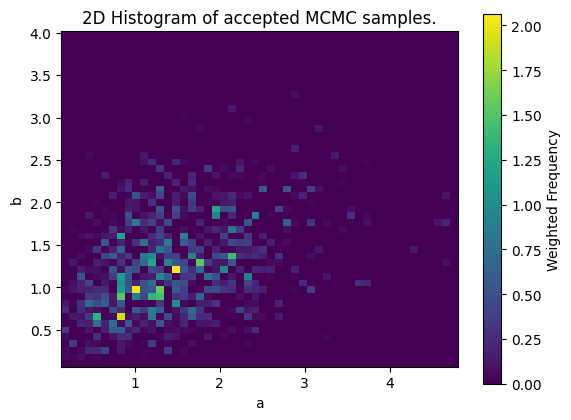

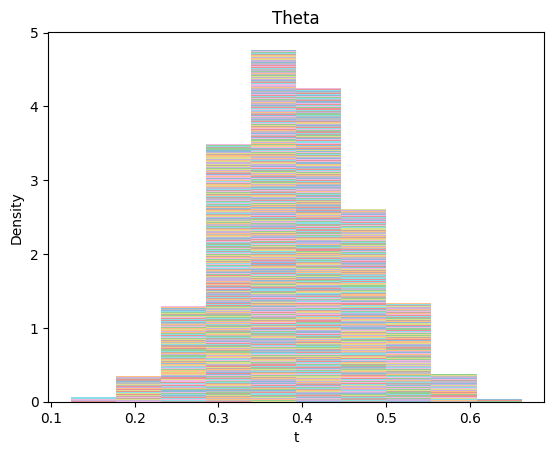

+-------------+--------+----------+
|  Parameter  |  Mean  | Variance |
+-------------+--------+----------+
| Alpha (Run) | 25.554 |  284.52  |
|  Beta (Run) | 41.445 | 1051.296 |
+-------------+--------+----------+


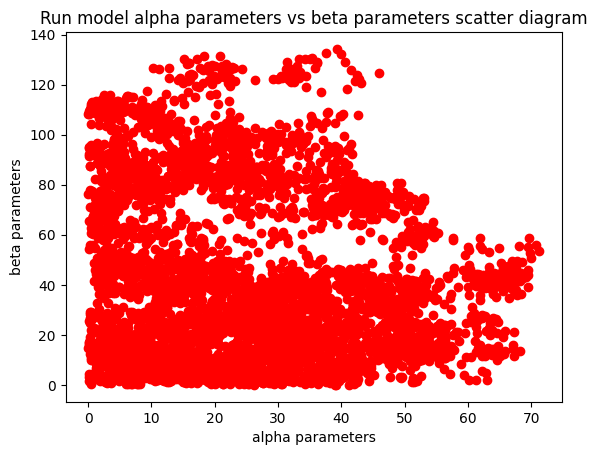

Oliveira
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.866 |  0.622   |
|  Beta (Trick) | 0.708 |  0.082   |
| Theta (Trick) | 0.421 |  0.004   |
+---------------+-------+----------+


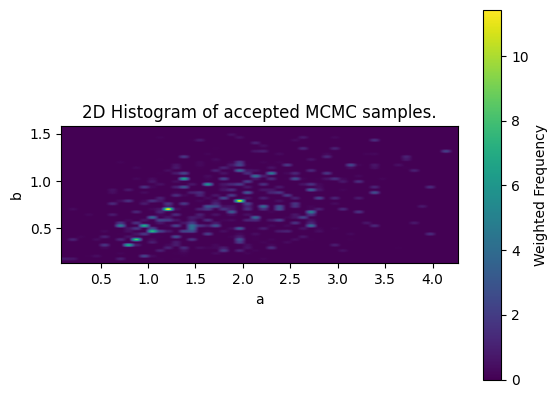

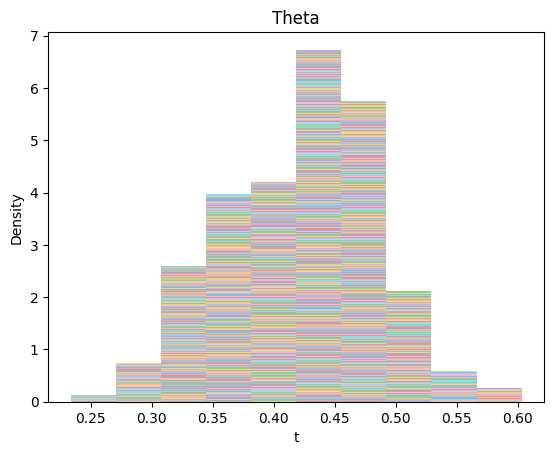

+-------------+---------+----------+
|  Parameter  |   Mean  | Variance |
+-------------+---------+----------+
| Alpha (Run) | 107.135 | 5237.602 |
|  Beta (Run) |  43.079 | 687.494  |
+-------------+---------+----------+


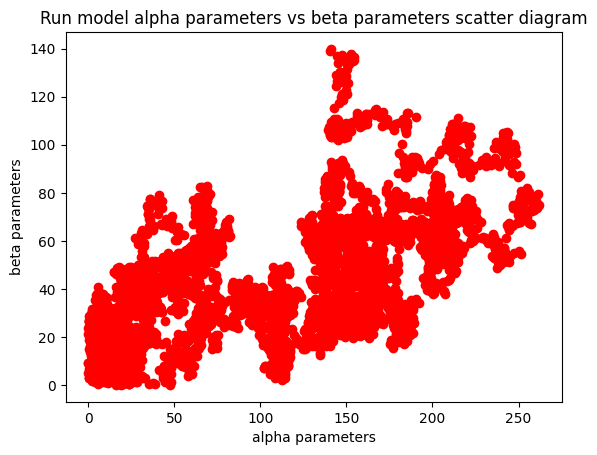

Decenzo
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.672 |   0.49   |
|  Beta (Trick) | 0.557 |  0.034   |
| Theta (Trick) | 0.395 |  0.002   |
+---------------+-------+----------+


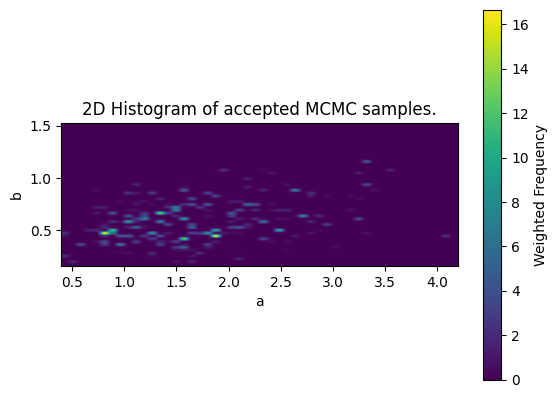

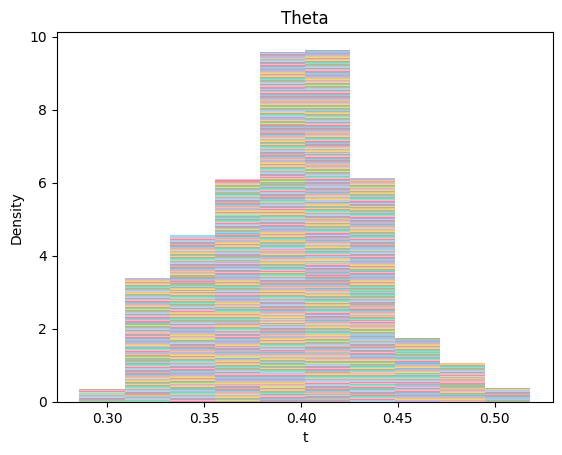

+-------------+---------+----------+
|  Parameter  |   Mean  | Variance |
+-------------+---------+----------+
| Alpha (Run) | 117.866 | 4863.187 |
|  Beta (Run) |  69.051 | 2246.73  |
+-------------+---------+----------+


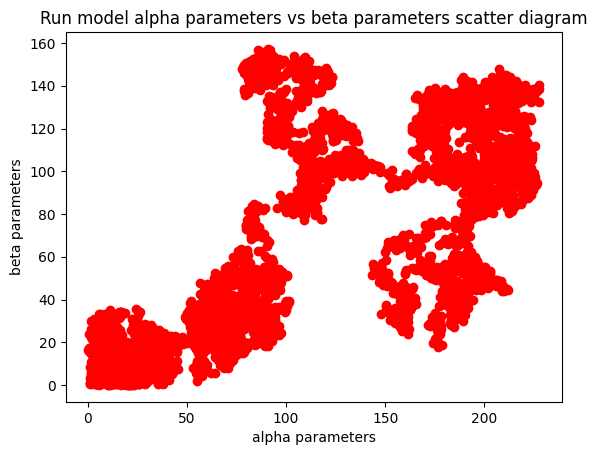

Santiago
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 2.252 |   1.73   |
|  Beta (Trick) |  2.39 |   1.91   |
| Theta (Trick) |  0.12 |  0.004   |
+---------------+-------+----------+


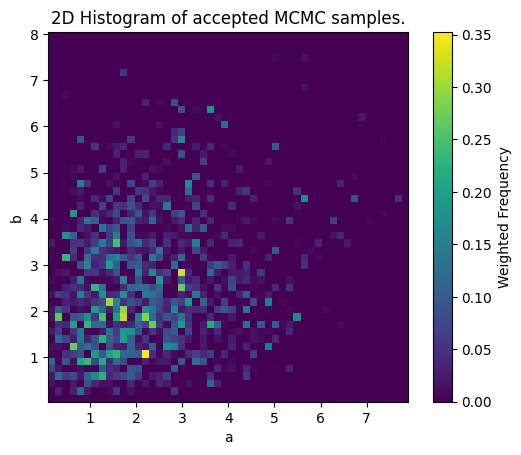

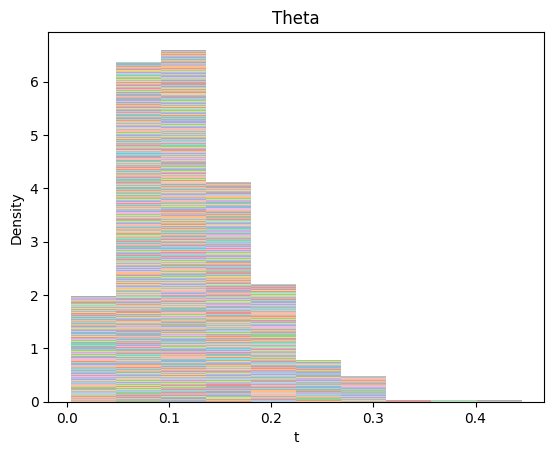

+-------------+---------+----------+
|  Parameter  |   Mean  | Variance |
+-------------+---------+----------+
| Alpha (Run) | 133.349 | 3382.285 |
|  Beta (Run) | 182.075 | 9988.535 |
+-------------+---------+----------+


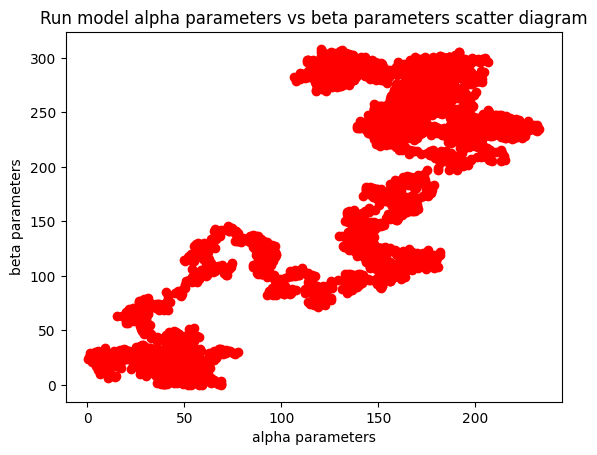

Papa
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.577 |  0.319   |
|  Beta (Trick) | 0.637 |   0.05   |
| Theta (Trick) | 0.436 |  0.002   |
+---------------+-------+----------+


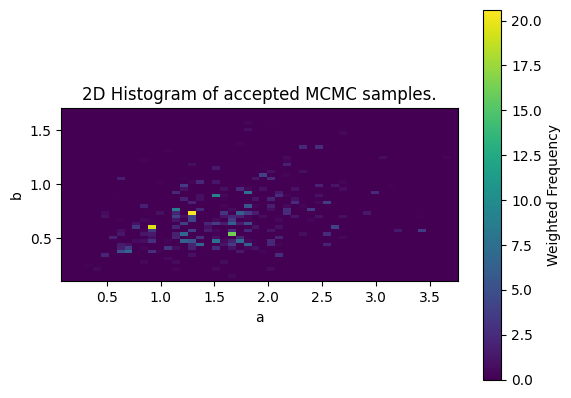

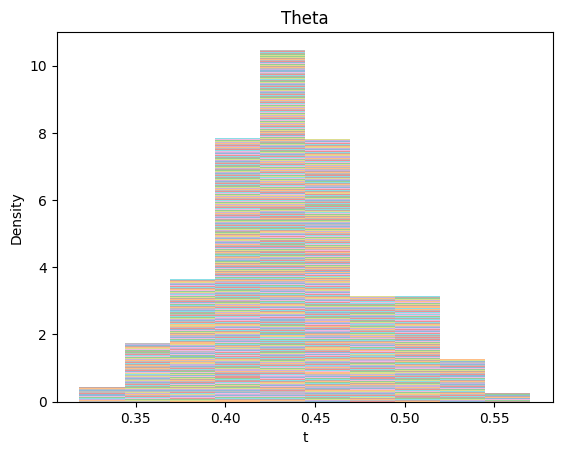

+-------------+--------+----------+
|  Parameter  |  Mean  | Variance |
+-------------+--------+----------+
| Alpha (Run) | 83.819 | 2285.159 |
|  Beta (Run) | 32.44  | 632.805  |
+-------------+--------+----------+


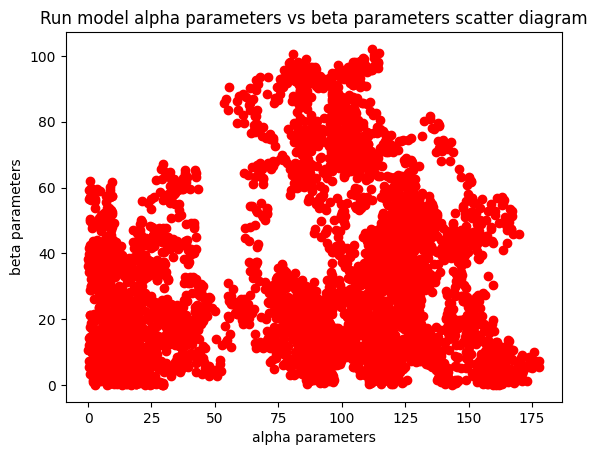

Eaton
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.707 |  0.451   |
|  Beta (Trick) | 0.688 |  0.084   |
| Theta (Trick) | 0.619 |  0.004   |
+---------------+-------+----------+


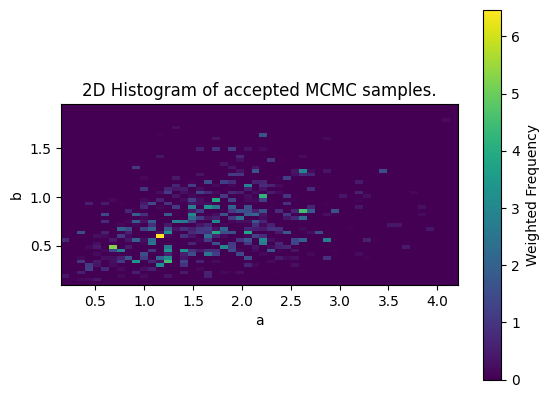

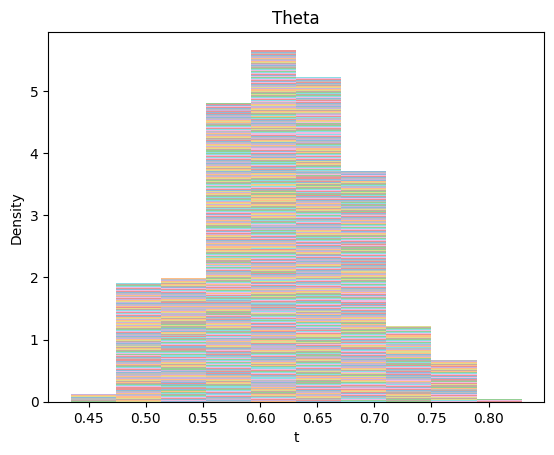

+-------------+--------+----------+
|  Parameter  |  Mean  | Variance |
+-------------+--------+----------+
| Alpha (Run) | 73.373 | 1190.167 |
|  Beta (Run) | 46.72  | 489.682  |
+-------------+--------+----------+


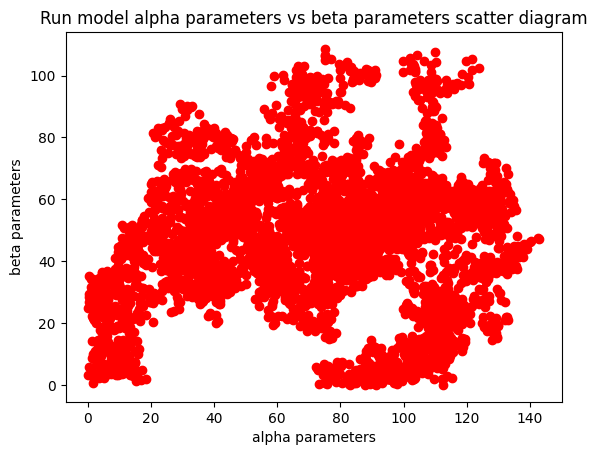

Mota
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.781 |  0.672   |
|  Beta (Trick) | 0.737 |  0.128   |
| Theta (Trick) | 0.263 |  0.004   |
+---------------+-------+----------+


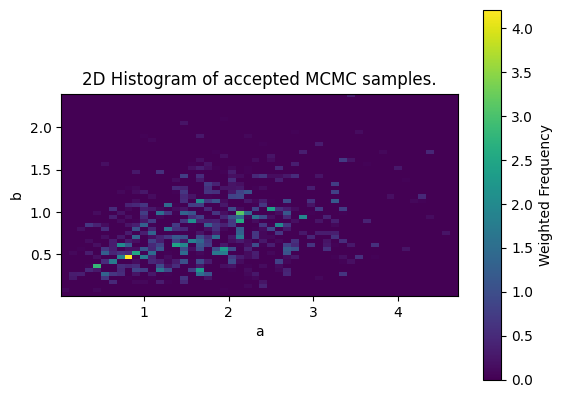

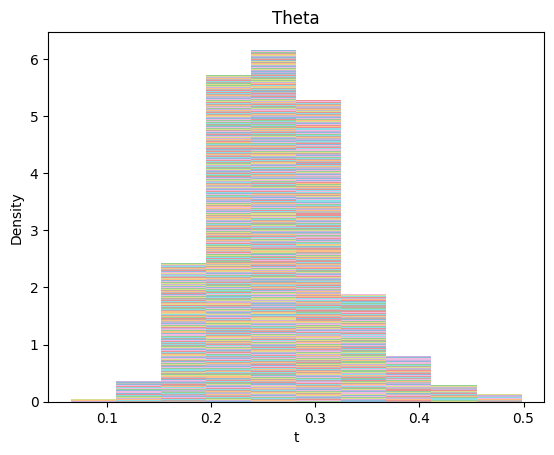

+-------------+--------+----------+
|  Parameter  |  Mean  | Variance |
+-------------+--------+----------+
| Alpha (Run) | 95.153 | 1050.298 |
|  Beta (Run) | 42.367 | 832.229  |
+-------------+--------+----------+


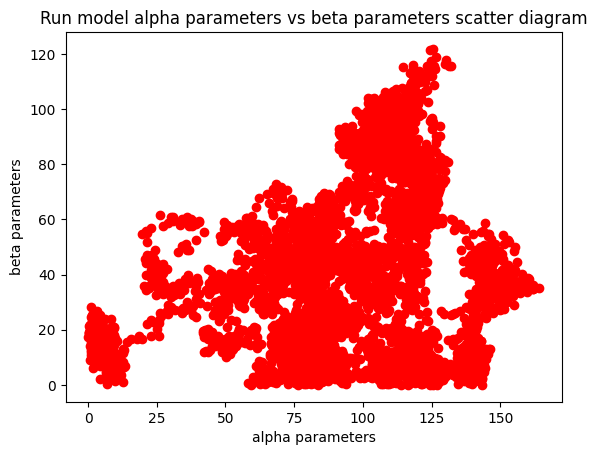

Shirai
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.981 |  0.519   |
|  Beta (Trick) | 0.329 |  0.011   |
| Theta (Trick) |  0.36 |  0.001   |
+---------------+-------+----------+


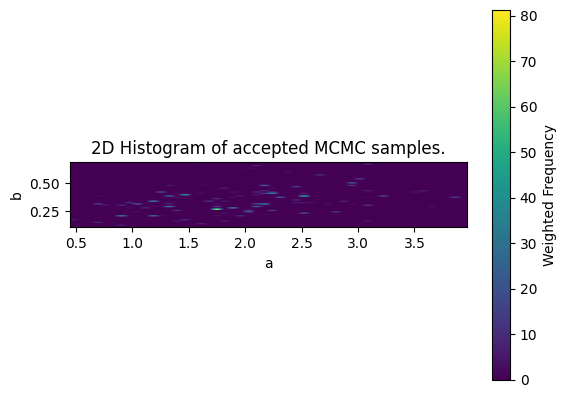

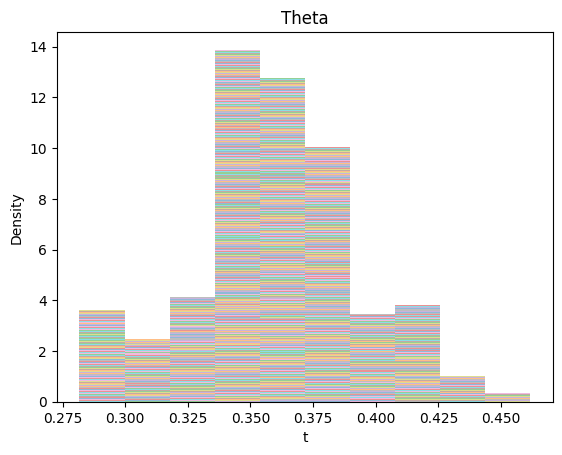

+-------------+--------+----------+
|  Parameter  |  Mean  | Variance |
+-------------+--------+----------+
| Alpha (Run) | 52.617 | 1613.598 |
|  Beta (Run) | 38.671 | 746.866  |
+-------------+--------+----------+


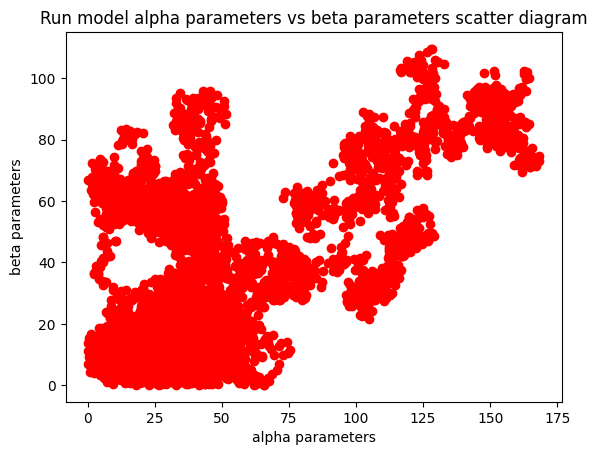

Jordan
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.659 |  0.434   |
|  Beta (Trick) | 0.487 |   0.03   |
| Theta (Trick) | 0.402 |  0.002   |
+---------------+-------+----------+


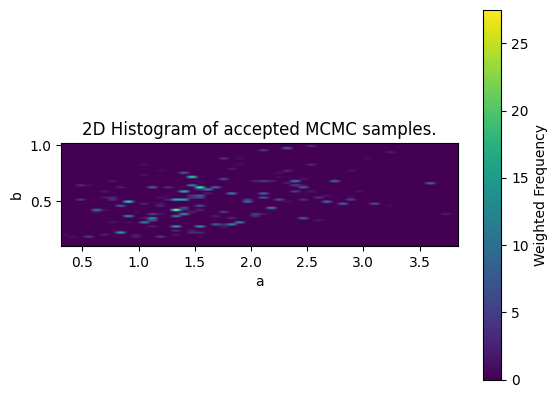

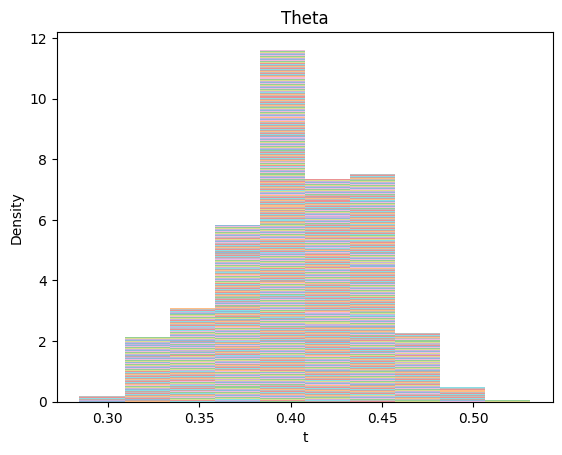

+-------------+---------+-----------+
|  Parameter  |   Mean  |  Variance |
+-------------+---------+-----------+
| Alpha (Run) |  78.98  |  2537.395 |
|  Beta (Run) | 132.071 | 16308.327 |
+-------------+---------+-----------+


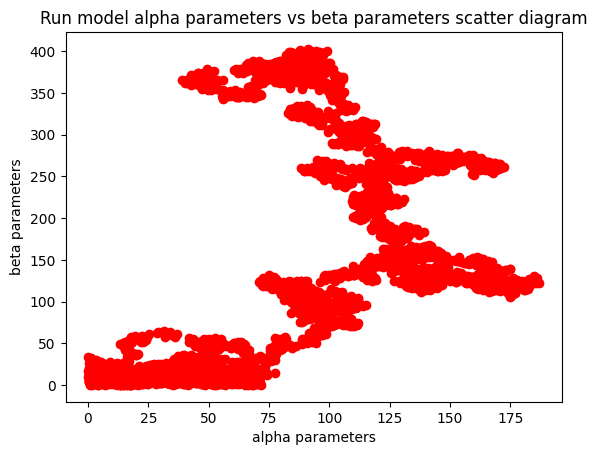

Hoefler
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.733 |  0.546   |
|  Beta (Trick) | 0.734 |  0.064   |
| Theta (Trick) | 0.389 |  0.002   |
+---------------+-------+----------+


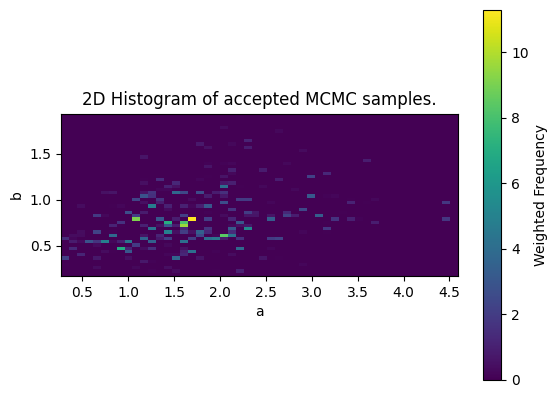

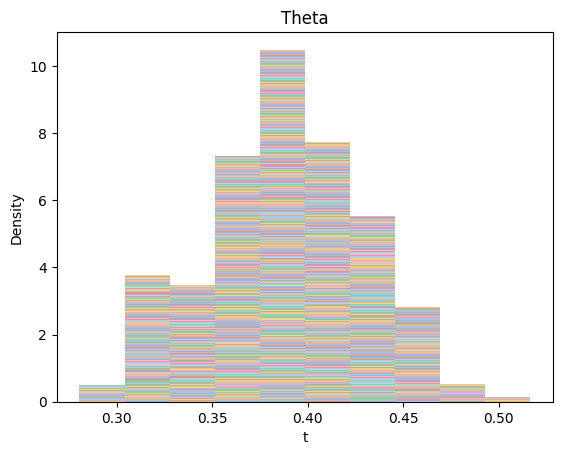

+-------------+---------+----------+
|  Parameter  |   Mean  | Variance |
+-------------+---------+----------+
| Alpha (Run) | 118.613 | 3316.824 |
|  Beta (Run) |  64.152 | 1044.685 |
+-------------+---------+----------+


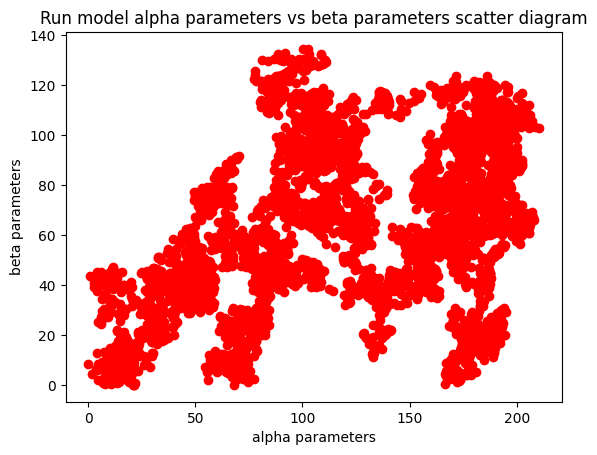

Hoban
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 2.244 |  0.723   |
|  Beta (Trick) | 0.416 |   0.02   |
| Theta (Trick) | 0.368 |  0.001   |
+---------------+-------+----------+


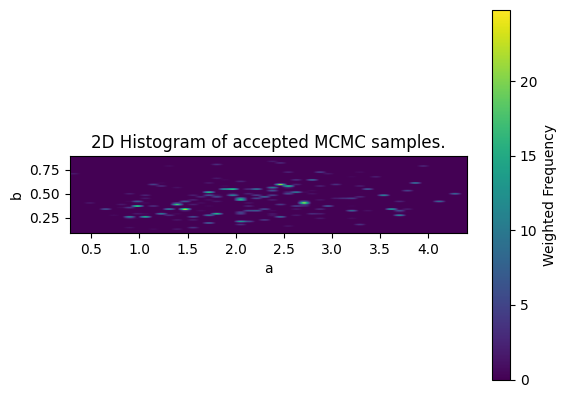

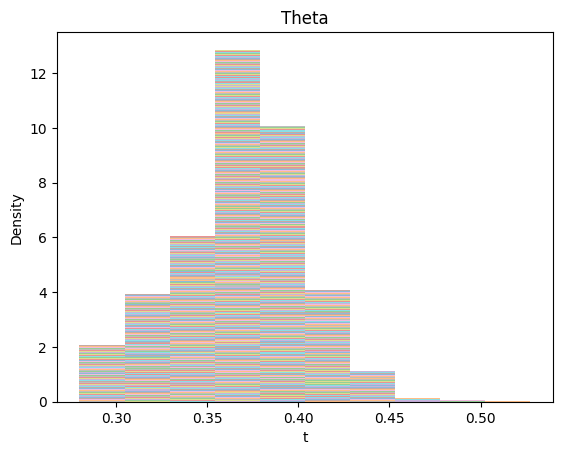

+-------------+---------+----------+
|  Parameter  |   Mean  | Variance |
+-------------+---------+----------+
| Alpha (Run) | 179.375 | 3486.638 |
|  Beta (Run) |  85.23  | 2973.239 |
+-------------+---------+----------+


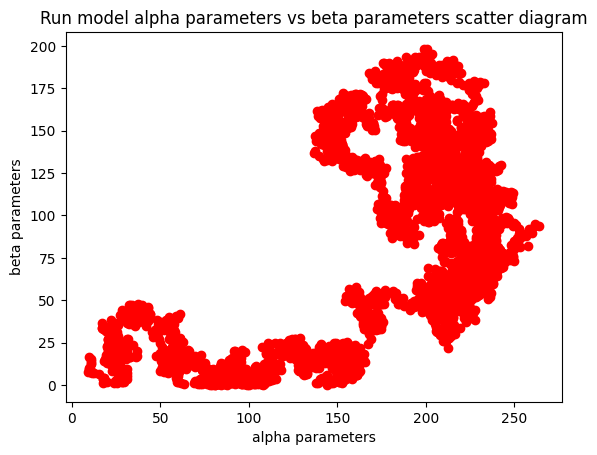

Gustavo
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.491 |  0.267   |
|  Beta (Trick) | 0.608 |  0.043   |
| Theta (Trick) | 0.401 |  0.001   |
+---------------+-------+----------+


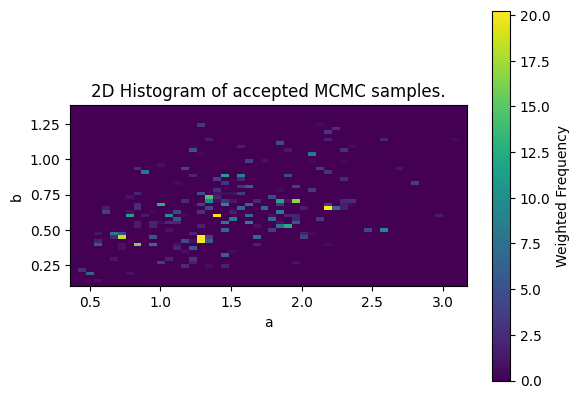

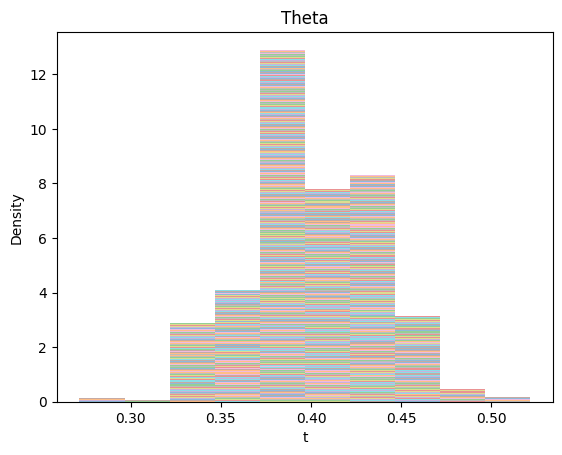

+-------------+--------+----------+
|  Parameter  |  Mean  | Variance |
+-------------+--------+----------+
| Alpha (Run) | 60.285 | 1133.424 |
|  Beta (Run) | 40.807 | 663.025  |
+-------------+--------+----------+


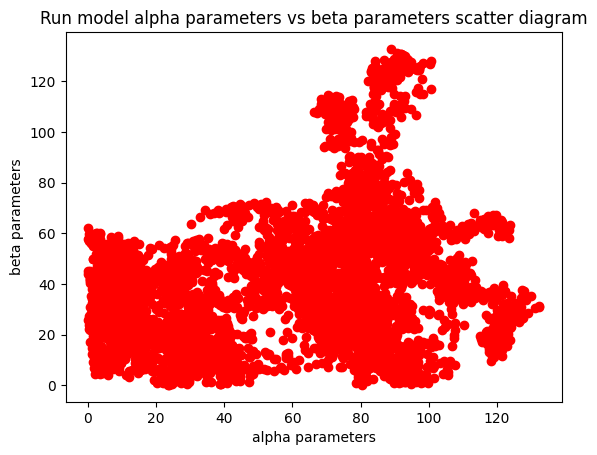

Ribeiro C
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 2.203 |   1.21   |
|  Beta (Trick) | 0.945 |   0.24   |
| Theta (Trick) |  0.26 |  0.004   |
+---------------+-------+----------+


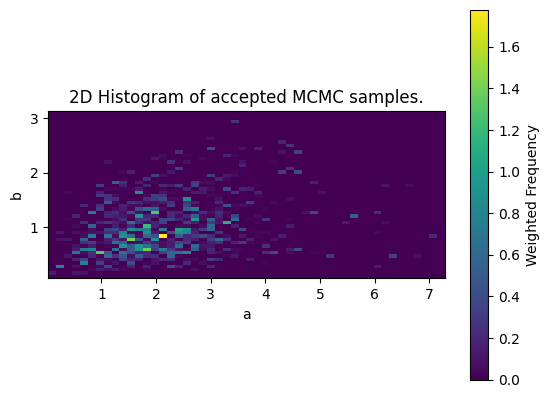

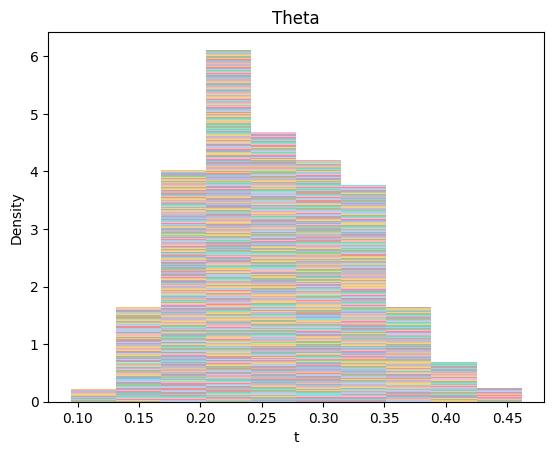

+-------------+--------+----------+
|  Parameter  |  Mean  | Variance |
+-------------+--------+----------+
| Alpha (Run) | 80.342 | 1498.081 |
|  Beta (Run) | 70.026 |  1528.4  |
+-------------+--------+----------+


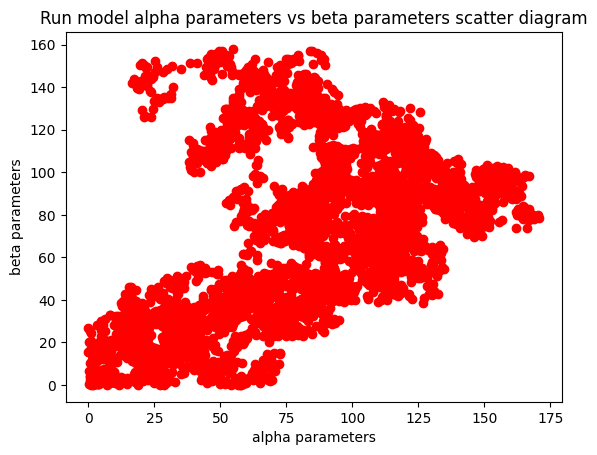

O’neill
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) |  2.21 |  1.167   |
|  Beta (Trick) | 0.725 |  0.121   |
| Theta (Trick) | 0.264 |  0.004   |
+---------------+-------+----------+


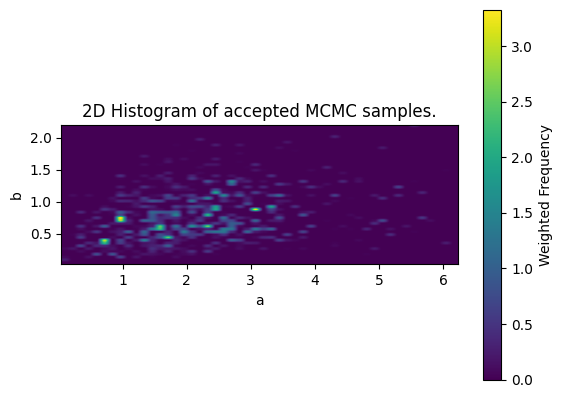

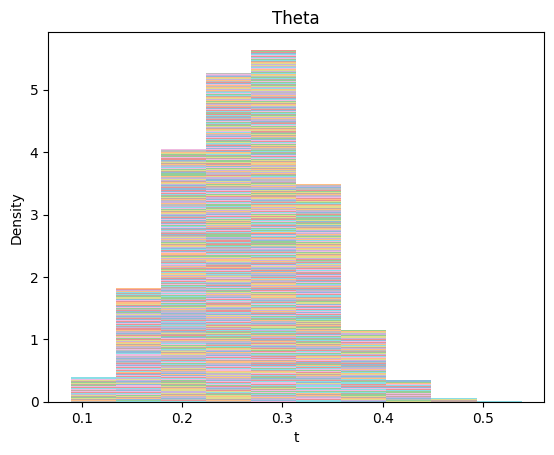

+-------------+---------+----------+
|  Parameter  |   Mean  | Variance |
+-------------+---------+----------+
| Alpha (Run) |  87.879 | 1130.113 |
|  Beta (Run) | 126.182 | 7032.854 |
+-------------+---------+----------+


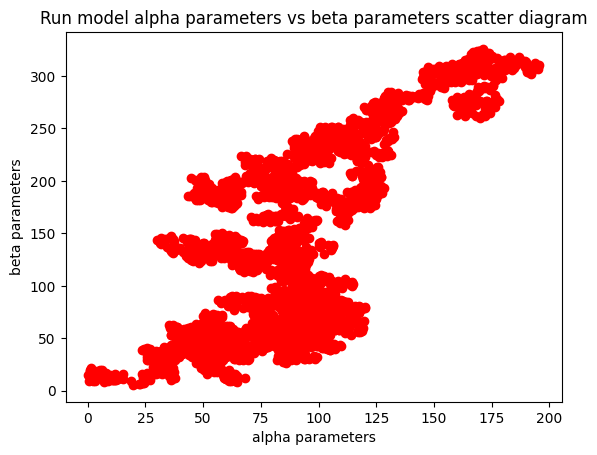

Foy
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.692 |  0.429   |
|  Beta (Trick) |  0.49 |  0.038   |
| Theta (Trick) | 0.508 |  0.003   |
+---------------+-------+----------+


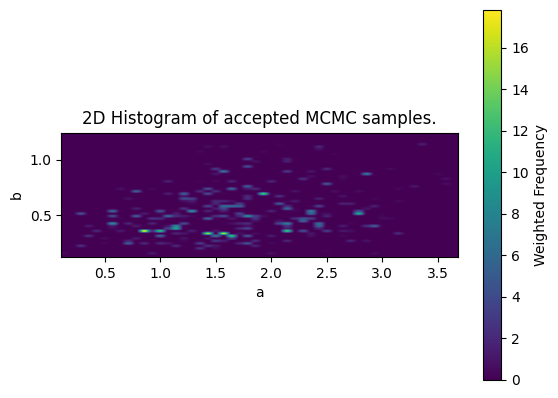

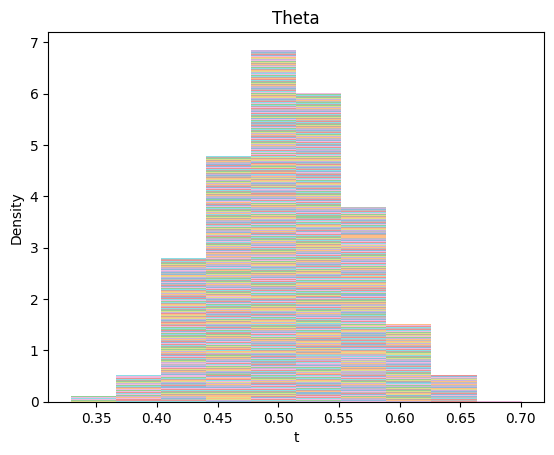

+-------------+--------+----------+
|  Parameter  |  Mean  | Variance |
+-------------+--------+----------+
| Alpha (Run) | 134.41 | 3869.858 |
|  Beta (Run) | 63.691 | 1464.175 |
+-------------+--------+----------+


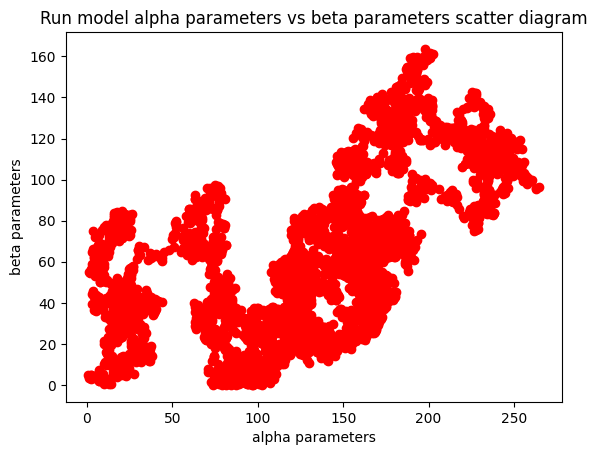

Midler
+---------------+-------+----------+
|   Parameter   |  Mean | Variance |
+---------------+-------+----------+
| Alpha (Trick) | 1.941 |  0.797   |
|  Beta (Trick) | 0.723 |  0.101   |
| Theta (Trick) | 0.339 |  0.003   |
+---------------+-------+----------+


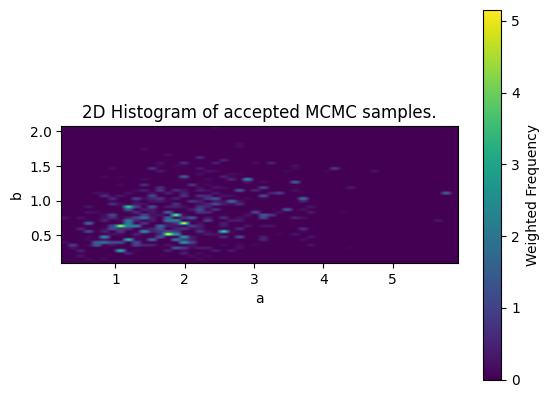

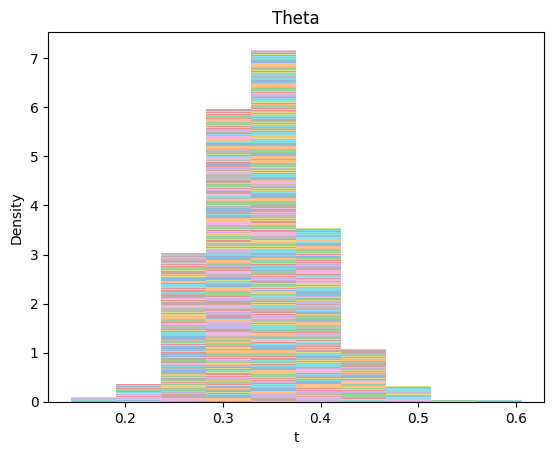

+-------------+--------+----------+
|  Parameter  |  Mean  | Variance |
+-------------+--------+----------+
| Alpha (Run) | 21.499 | 249.146  |
|  Beta (Run) | 84.308 | 2041.266 |
+-------------+--------+----------+


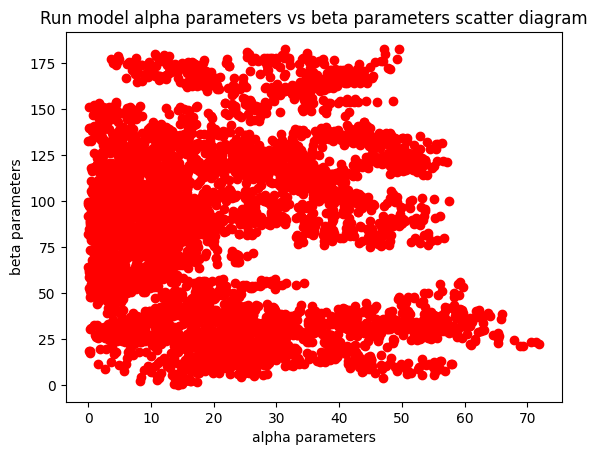

In [12]:
alpha_parameters_X = []
beta_parameters_X = []
theta_parameters = []
alpha_parameters_Y = []
beta_parameters_Y = []

for skater in skaters:
    # tricks
    X_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for trick_no in range(1, 6+1):
                    if df_alt["trick " + str(trick_no)][row] > 0:
                        X_outcomes.append(df_alt["trick " + str(trick_no)][row])
                    elif df_alt["trick " + str(trick_no)][row] == 0:
                        X_outcomes.append(df_alt["trick " + str(trick_no)][row])
        except KeyError:
            # print("hi")
            pass
    X_outcomes = np.array(X_outcomes)
    
    #la = .2
    #th = 5
    la = .8
    th = 4
    def likelihood(x, a, b, t):
        v = 0
        for x_el in x:
            if x_el != 0:
                v += 1
        log_dist = 0
        for x_el in x:
            if x_el == 0:
                log_dist += np.log((1-t)) + .5*np.log(.0001) + .5*np.log(1) - np.log(beta(.5,.5))
            elif x_el == 1:
                log_dist += np.log(t) + (a-1)*np.log(1) + (b-1)*np.log(.0001) - np.log(beta(a, b)) + th*np.log(la) - np.log(gamma(th)) + (th-1)*np.log(a + b + 1) \
                        + .5*np.log(x_el) + .5*np.log(.0001) - np.log(beta(.5,.5)) # -la*(a+b+1) - np.log(a+b) + v*np.log(t) + (len(x) - v)*np.log(1-t) \
                                        
            elif x_el != 0:
                log_dist += np.log(t) + (a-1)*np.log(x_el) + (b-1)*np.log(1-x_el) - np.log(beta(a, b)) + th*np.log(la) - np.log(gamma(th)) + (th-1)*np.log(a + b + 1) \
                        -la*(a+b+1) - np.log(a+b) + v*np.log(t) + (len(x) - v)*np.log(1-t) + .5*np.log(x_el) + .5*np.log(1-x_el) - np.log(beta(.5,.5))
        return np.exp(log_dist)

    
    # Sample values by MCMC
    a0 = stats.uniform.rvs(loc=5, size=1)
    b0 = stats.uniform.rvs(loc=5, size=1)
    t0 = stats.uniform.rvs(loc=0, size=1)
    n = 10000
    samples = [[a0, b0, t0]]
    for iteration in range(n-1):
        a_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
        b_guess = stats.norm.rvs(loc=samples[-1][1], scale=1, size=1)
        t_guess = stats.norm.rvs(loc=samples[-1][2], scale=.5, size=1)
        # Reject proposed samples if t is out of bounds
        while a_guess <= 0 or b_guess <= 0 or t_guess <= 0 or t_guess >= 1:
            a_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
            b_guess = stats.norm.rvs(loc=samples[-1][1], scale=1, size=1)
            t_guess = stats.norm.rvs(loc=samples[-1][2], scale=.5, size=1)
        R = likelihood(X_outcomes, a_guess, b_guess, t_guess) / likelihood(X_outcomes, samples[-1][0], samples[-1][1], samples[-1][2])
        u = stats.uniform.rvs(size=1)
        if u < min(R, 1):
            samples.append([a_guess, b_guess, t_guess])
        else:
            samples.append([samples[-1][0], samples[-1][1], samples[-1][2]])
            
    samples = samples[-5000:] # remove burn-in
    alpha_list = []
    beta_list = []
    theta_list = []
    for sample in samples:
        alpha_list.append(sample[0])
        beta_list.append(sample[1])
        theta_list.append(sample[2])
        
    # Print skater name
    print(skater)

    # Create a PrettyTable object
    table = PrettyTable()

    # Define the column names
    table.field_names = ["Parameter", "Mean", "Variance"]

    # Add data to the table
    table.add_row(["Alpha (Trick)", round(np.mean(alpha_list), 3), round(np.var(alpha_list, ddof=1), 3)])
    table.add_row(["Beta (Trick)", round(np.mean(beta_list), 3), round(np.var(beta_list, ddof=1), 3)])
    table.add_row(["Theta (Trick)", round(np.mean(theta_list), 3), round(np.var(theta_list, ddof=1), 3)])
    
    # Print the table
    print(table)
    
    plt.figure(1)
    # Histogram part(y)
    a_vals = np.linspace(min(alpha_list), max(alpha_list), 50)
    b_vals = np.linspace(min(beta_list), max(beta_list), 50)

    A, B = np.meshgrid(a_vals, b_vals)

    b_vals = b_vals[::-1]

    Z = np.zeros_like(A)
    for sample in samples:
        for i in range(A.shape[0]-1):
            for j in range(A.shape[1]-1):
                if a_vals[i] < sample[0] <= a_vals[i+1] and b_vals[j] > sample[1] >= b_vals[j + 1]:
                        Z[i, j] += 1
    # Create a 2D histogram with weights from Z
    hist, xedges, yedges = np.histogram2d(A.flatten(), B.flatten(), bins=(50, 50), weights=Z.flatten(), density=True)
    # Plot the histogram
    plt.imshow(hist, cmap='viridis', extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
    plt.colorbar(label='Weighted Frequency')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('2D Histogram of accepted MCMC samples.')
    plt.show()

    plt.figure(2)
    plt.title("Theta")
    plt.hist(theta_list, stacked=True, density=True, alpha=0.5)
    plt.xlabel('t')
    plt.ylabel('Density')
    plt.show()
    
    alpha_parameters_X.append(np.mean(alpha_list))
    beta_parameters_X.append(np.mean(beta_list))
    theta_parameters.append(np.mean(theta_list))
       
    # runs
    Y_outcomes = []
    for row in range(0, len(df)):
        try:
            if df_alt["id"][row] == skater:
                for run_no in range(1, 2+1):
                    # if pd.notna(df_alt["trick " + str(trick_no)][row]):  # Check if 'id' is not NaN
                    if df_alt["run " + str(run_no)][row] > 0:
                        Y_outcomes.append(df_alt["run " + str(trick_no)][row])
        except KeyError:
            # print("hi")
            pass
    Y_outcomes = np.array(Y_outcomes)
    
    #la = .2
    #th = 5
    #la = 1
    #th = 3
    
    la = .5
    th = 7
    def likelihood(y, a, b):
        log_dist = 0
        for y_el in y:
            if y_el == 1:
                log_dist += (a-1)*np.log(y_el) + (b-1)*np.log(.001) - np.log(beta(a,b)) \
                        # + th*np.log(la) - np.log(gamma(th)) + (th-1)*np.log(a+b+1) -la*(a+b+1) - np.log(a+b)
            else:   
                log_dist += (a-1)*np.log(y_el) + (b-1)*np.log(1-y_el) - np.log(beta(a,b)) \
                        # + th*np.log(la) - np.log(gamma(th)) + (th-1)*np.log(a+b+1) -la*(a+b+1) - np.log(a+b)
        return np.exp(log_dist)
    
    # Sample values by MCMC
    a0 = stats.uniform.rvs(loc=10, size=1)
    b0 = stats.uniform.rvs(loc=10, size=1)
    n = 5000
    samples = [[a0, b0]]
    for iteration in range(n-1):
        a_guess = stats.norm.rvs(loc=samples[-1][0], scale=2, size=1)
        b_guess = stats.norm.rvs(loc=samples[-1][1], scale=2, size=1)
        # Reject proposed samples if t is out of bounds
        while a_guess <= 0 or b_guess <= 0:
            a_guess = stats.norm.rvs(loc=samples[-1][0], scale=2, size=1)
            b_guess = stats.norm.rvs(loc=samples[-1][1], scale=2, size=1)
        R = likelihood(Y_outcomes, a_guess, b_guess) / likelihood(Y_outcomes, samples[-1][0], samples[-1][1])
        u = stats.uniform.rvs(size=1)
        if u < min(R, 1):
            samples.append([a_guess, b_guess])
        else:
            samples.append([samples[-1][0], samples[-1][1]])
            
    alpha_list = []
    beta_list = []
    for sample in samples:
        alpha_list.append(sample[0])
        beta_list.append(sample[1])
    
    alpha_parameters_Y.append(np.mean(alpha_list))
    beta_parameters_Y.append(np.mean(beta_list))
    # Create a PrettyTable object
    table = PrettyTable()

    # Define the column names
    table.field_names = ["Parameter", "Mean", "Variance"]

    # Add data to the table
    table.add_row(["Alpha (Run)", round(np.mean(alpha_list), 3), round(np.var(alpha_list, ddof=1), 3)])
    table.add_row(["Beta (Run)", round(np.mean(beta_list), 3), round(np.var(beta_list, ddof=1), 3)])

    # Print the table
    print(table)
    
    plt.figure(3)
    # Scatter plot for Y parameters
    plt.plot(alpha_list, beta_list, 'ro')
    plt.title('Run model alpha parameters vs beta parameters scatter diagram')
    plt.xlabel('alpha parameters')
    plt.ylabel('beta parameters')
    plt.show()


(d) Använd din bayesiansk modell för $[X_i, Y_i]^T$ för att simulera 5000 LCQ:ar genom att ta utfall från de lämpliga de aposteriori prediktiva fördelningarna. Vad är typvärdet av dina utfall $W_1, ... ,W_{5000}$? Hur många av de riktiga vinnarna förutsägs? Vad är den skattade sannolikheten för de riktiga vinnarna baserat på dina utfall? Av typvärdet?

In [13]:
# (d) lastly: simulate 5000 cups
all_winners = []

for cup in range(5000):
    # 2 runs for each skater
    # 4 tricks for eachs skater
    # calculate scores
    # Set W = [W1, W2, W3, W4], W for Winners
    grades_list = []
    for skater_no in range(len(skaters)):
        run_list = stats.beta.rvs(a=alpha_parameters_Y[skater_no], b=beta_parameters_Y[skater_no], size=2)
        r1 = run_list[0] 
        r2 = run_list[1]
        trick_list = stats.beta.rvs(a=alpha_parameters_X[skater_no], b=beta_parameters_X[skater_no], size=4)
        make_list = stats.bernoulli.rvs(p=theta_parameters[skater_no], size=4)
        # remove the tricks they didn't make
        made_trick_list = []
        for t in range(4):
            if make_list[t]:
                made_trick_list.append(trick_list[t])
            else:
                made_trick_list.append(0) # I could just leave it blanc, but this is easier when calculating grades later

        # calculate grades
        # sort, and pop from trick list
        made_trick_list.sort()
        top_trick = made_trick_list.pop()
        next_top_trick = made_trick_list.pop()    

        grade = max(run_list) + top_trick + next_top_trick
        grades_list.append(grade)

    # Extract indices of top four grades
    top_four_indices = np.argsort(grades_list)[::-1][:4]

    # The top four grades
    top_four_grades = [grades_list[i] for i in top_four_indices]

    for k in range(4):
        all_winners.append(skaters[top_four_indices[k]])
          
# Find average winners (doesn't really matter if they're 1st or 4th)
skater_counts = Counter(all_winners)

# Get the top four skaters and their counts
top_four_skaters = skater_counts.most_common(4)

# Print the top four skaters
print("Top four skaters:")
for skater, count in top_four_skaters:
    print(f"{skater}: {count} wins")

Top four skaters:
Foy: 2716 wins
Eaton: 2605 wins
Hoban: 1938 wins
Papa: 1901 wins


(e) I modellen i uppgift 3(d) antog vi att parametrarna Υi för Yi och parametrarna $Θ_i = [Θ_i, A_i, B_i]^T$ för $X_i$ är oberoende givet data (varför?). Samtidigt antog vi inte att $Θ_i ⊥⊥ A_i, B_i$ är oberoende givet data. Låt $X_i^{(1)}$, $X_i^{(12)}$, $X_i^{(3)}$, $X_i^{(4)}$ betecknar skateboardåkare $i$:s fyra trickbetyg, låt $Y_i^{(1)}$, $Y_i^{(2)}$ betecknar skateboardåkare $i$:s två runbetyg och låt $O_i$ betecknar deras totalbetyg. Rita en acyklisk riktad graf med så få kanter som möjligt så att den simultana fördelningen för $O_i$, $X_i^{(1)}$, $X_i^{(2)}$, $X_i^{(3)}$, $X_i^{(4)}$, $Y_i^{(1)}$, $Y_i^{(2)}$, $Θ_i$, $A_i$, $B_i$ och $Υ$ är markovsk
med avseende på den. Baserat på din graf kan du dra slutsatsen att den
marginella aposteriorifördelningen för $Θ_i$, $A_i$, och $B_i$ faktoriserar som

$f_{θ_i,α_i,β_i|X_i}$($θ_i, α_i, β_i|x_i$) = $f_{θ_i|X_i}$($θ_i|x_i)$$f_{α_i,β_i|X_i}$($α_i, β_i|x_i$)?

Betrakta dina parametrarna $Υ_i$ för $Y_i$ och parametrarna $Θ_i$ för $X_i$. Enligt din graf är vårt antagande att $Υ_i ⊥⊥ Θ_i|X_i^{(1)},X_i^{(2)}X_i^{(3)}X_i^{(4)},Y_i^{(1)}Y_i^{(2)}$
vettigt? Kan vi anta oberoenderelationen $Υ_i ⊥⊥ Θ_i|O_i$ om bara datan $o_i$ är givet istället?


OBS!: Detta görs i rapporten, ej här!

4. En bayesiansk modell med en hierarki. För att ta hänsyn till möjliga variationer i skateboardåkarnas prestationer mellan olika tävlingar kan vi bygga en modell som använda en hierarki. Som vi såg i föreläsningarna kan vi bygga en bayesiansk hierarki för $V_i ∼ Ber(θ_i)$ om vi grupperar utfall vi enligt de olika tävlingarna. För enkelhets skull använder vi våra frekventisktiska punktskattningar för parametrarna $α_i$, $β_i$ och parametrarna för $Y_i$ från uppgift 2.


(a) Anta att $Θ_i|C_i = c_i, D_i = d_i ∼ Beta(c_i, d_i)$ och välj en lämplig simultan apriorifördelning för $[Θ_i, C_i, D_i]^T$. (Här är $C_i$ och $D_i$ hyperparametrarna för den bayesianska hierarkiska modellen som i råttorna exemplet i föreläsning 11.) Motivera ditt val.


(b) Generera 5000 slumpmässiga utfall från den simultana aposteriorifördelningen

$f_{A_i,B_i}|X_i(a_i, b_i|x_i)$.

Använd dina simuleringar för att generera 5000 slumpmässiga utfall från den marginella aposteriorifördelningen $Θ_i|X_i = x_i$. Gör diagram med dina utfall för följande aposteriorifördelningar: 

$f_{θ_i|X_i}(θ_i|x_i)$ och $f_{A_i,B_i|X_i}(a_i, b_i|x_i)$,

Ge skattningar för aposterioriväntevärdet och aposteriorivariansen för var och en av parametrarna. Hur jämför dessa varianser för $θ_i$ med varianserna för $θ_i$ beräknade för modellen i Uppgift 3?


Majerus
[]
[1, 0, 0, 1]
[]
[0, array([1, 0, 0, 1]), 0]
0
[1 0 0 1]
0
jacksonville
0
seattle
[1 0 0 1]


C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:77: RuntimeWarning: overflow encountered in exp
C:\Users\manip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in true_divide


seattle
+---------------+---------+----------+
|   Parameter   |   Mean  | Variance |
+---------------+---------+----------+
| Alpha (Trick) | 710.047 |  0.778   |
|  Beta (Trick) | 717.133 |  1.519   |
+---------------+---------+----------+


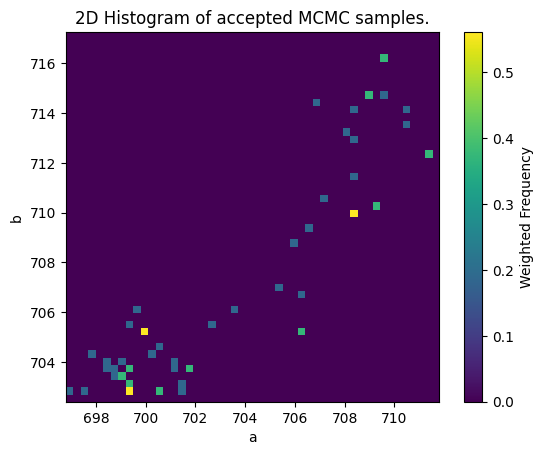

In [ ]:
thetas_jackson = []
thetas_seattle = []
thetas_vegas = []
for skater in skaters:
    print(skater)
    # tricks
    def check_location(location):
        X_makes = []
        for row in range(0, len(df_alt)):
            try:
                if df_alt["id"][row] == skater and df_alt["location"][row] == location:
                    for trick_no in range(1, 6+1):
                        if df_alt["trick " + str(trick_no)][row] > 0:
                            X_makes.append(1)
                        elif df_alt["trick " + str(trick_no)][row] == 0:
                            X_makes.append(0)
            except KeyError:
                pass
        print(X_makes)
        X_makes = np.array(X_makes)
        return X_makes

    array_list = []
    # array_list = np.array(array_list)
    
    # jacksonville
    X_makes_jacksonville = check_location("jacksonville")
    if len(X_makes_jacksonville) == 0:
        array_list.append(0)
    else:
        array_list.append(X_makes_jacksonville)
    
    # seattle
    X_makes_seattle = check_location("seattle")
    if len(X_makes_seattle) == 0:
        array_list.append(0)
    else:
        array_list.append(X_makes_seattle)
    
    # las vegas
    X_makes_las_vegas = check_location("las vegas")
    if len(X_makes_las_vegas) == 0:
        array_list.append(0)
    else:
        array_list.append(X_makes_las_vegas)
    
    print(array_list)
    print(array_list[0])
    print(array_list[1])
    print(array_list[2])
    for loc in range(len(array_list)):
        if loc == 0:
            location = "jacksonville"
        elif loc == 1:
            location = "seattle"
        elif loc == 2:
            location = "las vegas"
        print(location)
        print(array_list[loc])
        
        try:
            if array_list[loc] == 0:            
                if loc == 0:
                    thetas_jackson.append(2) # an impossible value to mark no outcomes
                elif loc == 1:
                    thetas_seattle.append(2)
                elif loc == 2:
                    thetas_vegas.append(2)
                continue
        except ValueError:
            pass
        
        def likelihood(X_makes, a,b):
            t_est = sum(X_makes) / len(X_makes)
            log_dist = 0
            log_dist += sum(X_makes)*np.log(t_est) + (len(X_makes)-sum(X_makes))*np.log(1-t_est) + (a-1)*t_est + (b-1)*(1-t_est) - beta(a,b)
            return np.exp(log_dist)

        # Sample values by MCMC
        a0 = stats.uniform.rvs(loc=10, size=1)
        b0 = stats.uniform.rvs(loc=10, size=1)
        n = 10000
        samples = [[a0, b0]]
        for iteration in range(n-1):
            a_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
            b_guess = stats.norm.rvs(loc=samples[-1][1], scale=1, size=1)
            # Reject proposed samples if a or b is out of bounds
            while a_guess <= 0 or b_guess <= 0:
                a_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
                b_guess = stats.norm.rvs(loc=samples[-1][1], scale=1, size=1)
            R = likelihood(array_list[loc], a_guess, b_guess) / likelihood(array_list[loc], samples[-1][0], samples[-1][1])
            u = stats.uniform.rvs(size=1)
            if u < min(R, 1):
                samples.append([a_guess, b_guess])
            else:
                samples.append([samples[-1][0], samples[-1][1]])

        samples = samples[-5000:] # remove burn-in
        alpha_list = []
        beta_list = []
        for sample in samples:
            alpha_list.append(sample[0])
            beta_list.append(sample[1])

        print(location)

        # Create a PrettyTable object
        table = PrettyTable()

        # Define the column names
        table.field_names = ["Parameter", "Mean", "Variance"]

        # Add data to the table
        table.add_row(["Alpha (Trick)", round(np.mean(alpha_list), 3), round(np.var(alpha_list, ddof=1), 3)])
        table.add_row(["Beta (Trick)", round(np.mean(beta_list), 3), round(np.var(beta_list, ddof=1), 3)])

        # Print the table
        print(table)

        plt.figure(1)
        # Histogram part(y)
        a_vals = np.linspace(min(alpha_list), max(alpha_list), 50)
        b_vals = np.linspace(min(beta_list), max(beta_list), 50)

        A, B = np.meshgrid(a_vals, b_vals)

        b_vals = b_vals[::-1]

        Z = np.zeros_like(A)
        for sample in samples:
            for i in range(A.shape[0]-1):
                for j in range(A.shape[1]-1):
                    if a_vals[i] < sample[0] <= a_vals[i+1] and b_vals[j] > sample[1] >= b_vals[j + 1]:
                            Z[i, j] += 1
        # Create a 2D histogram with weights from Z
        hist, xedges, yedges = np.histogram2d(A.flatten(), B.flatten(), bins=(50, 50), weights=Z.flatten(), density=True)
        # Plot the histogram
        plt.imshow(hist, cmap='viridis', extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
        plt.colorbar(label='Weighted Frequency')
        plt.xlabel('a')
        plt.ylabel('b')
        plt.title('2D Histogram of accepted MCMC samples.')
        plt.show()
        
        a_mean = np.mean(alpha_list)
        b_mean = np.mean(beta_list)
        # Theta given X
        def likelihood(X_makes,t):
            log_dist += sum(X_makes)*np.log(t) + (len(X_makes)-sum(X_makes))*np.log(1-t) + (a_mean-1)*t + (b_mean-1)*(1-t) - beta(a_mean,b_mean)
            return np.exp(log_dist)
 
        # Sample values by MCMC
        t0 = stats.uniform.rvs(size=1)
        n = 10000
        samples = [t0]
        for iteration in range(n-1):
            t_guess = stats.norm.rvs(loc=samples[-1][0], scale=1, size=1)
            # Reject proposed samples if t is out of bounds
            while t_guess <= 0 or t_guess >= 0:
                t_guess = stats.norm.rvs(loc=samples[-1], scale=1, size=1)
            R = likelihood(array_list[loc], t_guess) / likelihood(array_list[loc], samples[-1])
            u = stats.uniform.rvs(size=1)
            if u < min(R, 1):
                samples.append(t_guess)
            else:
                samples.append(samples[-1])

        samples = samples[-5000:] # remove burn-in
        theta_list = []
        for sample in samples:
            theta_list.append(sample)

        # Create a PrettyTable object
        table = PrettyTable()

        # Define the column names
        table.field_names = ["Parameter", "Mean", "Variance"]

        # Add data to the table
        table.add_row(["Theta (Trick)", round(np.mean(theta_list), 3), round(np.var(theta_list, ddof=1), 3)])

        # Print the table
        print(table)
        
        if loc == 0:
            thetas_jackson.append(np.mean(theta))
        elif loc == 1:
            thetas_seattle.append(np.mean(theta))
        elif loc == 2:
            thetas_vegas.append(np.mean(theta))

(c) Med hjälp av dina 5000 utfall från del (b) simulera 5000 LCQ tävlingsvinnare och beräkna typvärdet av resultatet. Vilka är de respektive skattade sannolikheterna för de riktigaa vinnarn och ditt typvärde?

In [ ]:
# (c) lastly: simulate 5000 cups
all_winners = []

#freq_alpha_x = alpha_parameters_X
#freq_beta_x = beta_parameters_X
#freq_alpha_y = alpha_parameters_Y
#freq_beta_y = beta_parameters_Y

for cup in range(5000):
    # 2 runs for each skater
    # 4 tricks for eachs skater
    # calculate scores
    # Set W = [W1, W2, W3, W4], W for Winners
    grades_list = []
    for skater_no in range(len(skaters)):
        run_list = stats.beta.rvs(a=freq_alpha_y[skater_no], b=freq_beta_y[skater_no], size=2)
        r1 = run_list[0] 
        r2 = run_list[1]
        trick_list = stats.beta.rvs(a=freq_alpha_x[skater_no], b=freq_beta_x[skater_no], size=4)
        
        #thetas_jackson = []
        #thetas_seattle = []
        #thetas_vegas = []
        jacksson_theta = thetas_jackson[skater_no]
        seattle_theta = thetas_seattle[skater_no]
        vegas_theta = thetas_vegas[skater_no]
        
        list_of_participated_theta = []
        non_participation_counter = 0
        if jacksson_theta == 0:
            non_participation_counter += 1
        else:
            list_of_participated_theta.append(jacksson_theta)
        if seattle_theta == 0:
            non_participation_counter += 1
        else:
            list_of_participated_theta.append(seattle_theta)
        if vegas_theta == 0:
            non_participation_counter += 1
        else:
            list_of_participated_theta.append(vegas_theta)
        
        make_list = []
        # distribute evenly between locations
        for iteration in range(4):
            number = random.randint(0, 2-non_participation_counter)
            make_list.append(stats.bernoulli.rvs(p=list_of_participated_theta[number], size=1))

        # remove the tricks they didn't make
        made_trick_list = []
        for t in range(4):
            if make_list[t]:
                made_trick_list.append(trick_list[t])
            else:
                made_trick_list.append(0) # I could just leave it blanc, but this is easier when calculating grades later

        # calculate grades
        # sort, and pop from trick list
        made_trick_list.sort()
        top_trick = made_trick_list.pop()
        next_top_trick = made_trick_list.pop()    

        grade = max(run_list) + top_trick + next_top_trick
        grades_list.append(grade)

    # Extract indices of top four grades
    top_four_indices = np.argsort(grades_list)[::-1][:4]

    # The top four grades
    top_four_grades = [grades_list[i] for i in top_four_indices]

    for k in range(4):
        all_winners.append(skaters[top_four_indices[k]])
          
# Find average winners (doesn't really matter if they're 1st or 4th)
skater_counts = Counter(all_winners)

# Get the top four skaters and their counts
top_four_skaters = skater_counts.most_common(4)

# Print the top four skaters
print("Top four skaters:")
for skater, count in top_four_skaters:
    print(f"{skater}: {count} wins")